In [2]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf


In [3]:
#Loading Dataset
stocks = ['AAPL','GOOGL','MSFT','AMZN']
stock_data = yf.download(stocks,start='2023-01-01',end = '2024-01-01')

[*********************100%%**********************]  4 of 4 completed


In [4]:
stock_data.head()

Price        Adj Close                                         Close  \
Ticker            AAPL       AMZN      GOOGL        MSFT        AAPL   
Date                                                                   
2023-01-03  124.048042  85.820000  89.017838  236.609222  125.070000   
2023-01-04  125.327515  85.139999  87.979027  226.259171  126.360001   
2023-01-05  123.998459  83.120003  86.101181  219.553375  125.019997   
2023-01-06  128.560867  86.080002  87.239868  222.140900  129.619995   
2023-01-09  129.086533  87.360001  87.919090  224.303711  130.149994   

Price                                               High             ...  \
Ticker           AMZN      GOOGL        MSFT        AAPL       AMZN  ...   
Date                                                                 ...   
2023-01-03  85.820000  89.120003  239.580002  130.899994  86.959999  ...   
2023-01-04  85.139999  88.080002  229.100006  128.660004  86.980003  ...   
2023-01-05  83.120003  86.199997  222.309998  127.769997  85.419998  ...   
2023-01-06  86.080002  87.339996  224.929993  130.289993  86.400002  ...   
2023-01-09  87.360001  88.019997  227.119995  133.410004  89.480003  ...   

Price             Low                    Open                        \
Ticker          GOOGL        MSFT        AAPL       AMZN      GOOGL   
Date                                                                  
2023-01-03  88.519997  237.399994  130.279999  85.459999  89.589996   
2023-01-04  87.269997  225.960007  126.889999  86.550003  90.349998   
2023-01-05  85.900002  221.759995  127.129997  85.330002  87.470001   
2023-01-06  84.860001  219.350006  126.010002  83.029999  86.790001   
2023-01-09  87.860001  226.410004  130.470001  87.459999  88.360001   

Price                      Volume                                
Ticker            MSFT       AAPL      AMZN     GOOGL      MSFT  
Date                                                             
2023-01-03  243.080002  112117500  76706000  28131200  25740000  
2023-01-04  232.279999   89113600  68885100  34854800  50623400  
2023-01-05  227.199997   80962700  67930800  27194400  39585600  
2023-01-06  223.000000   87754700  83303400  41381500  43613600  
2023-01-09  226.449997   70790800  65266100  29003900  27369800  

[5 rows x 24 columns]

In [5]:
#Data Cleaning
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   250 non-null    float64
 1   (Adj Close, AMZN)   250 non-null    float64
 2   (Adj Close, GOOGL)  250 non-null    float64
 3   (Adj Close, MSFT)   250 non-null    float64
 4   (Close, AAPL)       250 non-null    float64
 5   (Close, AMZN)       250 non-null    float64
 6   (Close, GOOGL)      250 non-null    float64
 7   (Close, MSFT)       250 non-null    float64
 8   (High, AAPL)        250 non-null    float64
 9   (High, AMZN)        250 non-null    float64
 10  (High, GOOGL)       250 non-null    float64
 11  (High, MSFT)        250 non-null    float64
 12  (Low, AAPL)         250 non-null    float64
 13  (Low, AMZN)         250 non-null    float64
 14  (Low, GOOGL)        250 non-null    float64
 15  (Low, MSFT)         250 non-null    fl

In [6]:
stock_data.shape

(250, 24)

In [8]:
stock_data.isna().sum()

Price      Ticker
Adj Close  AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
Close      AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
High       AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
Low        AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
Open       AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
Volume     AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
dtype: int64

In [9]:
stock_data.duplicated().sum()

0

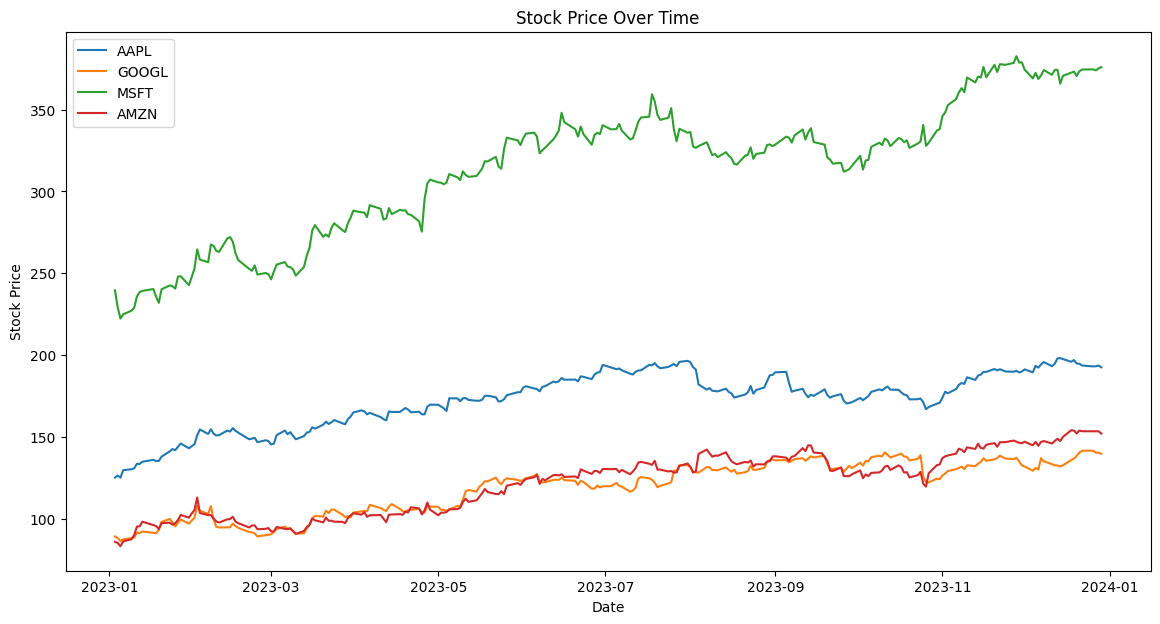

In [17]:
# closing price over time for each stock
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(stock_data['Close'][stock], label=stock)
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

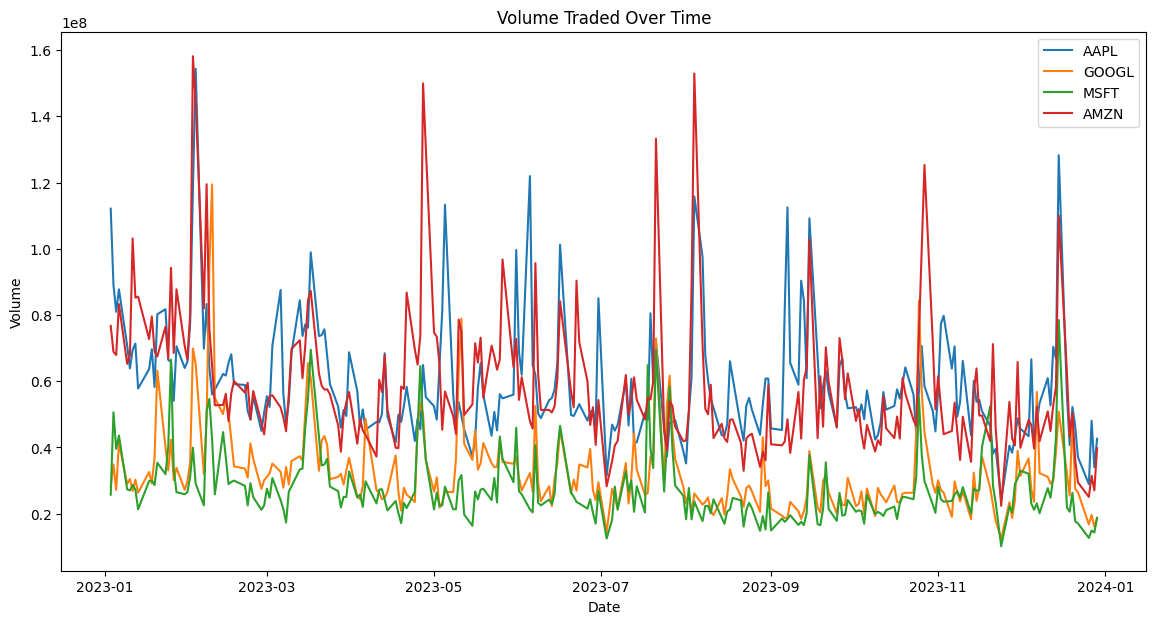

In [18]:
# Change in Stocks's Volume Being Traded Over Time
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(stock_data['Volume'][stock], label=stock)
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

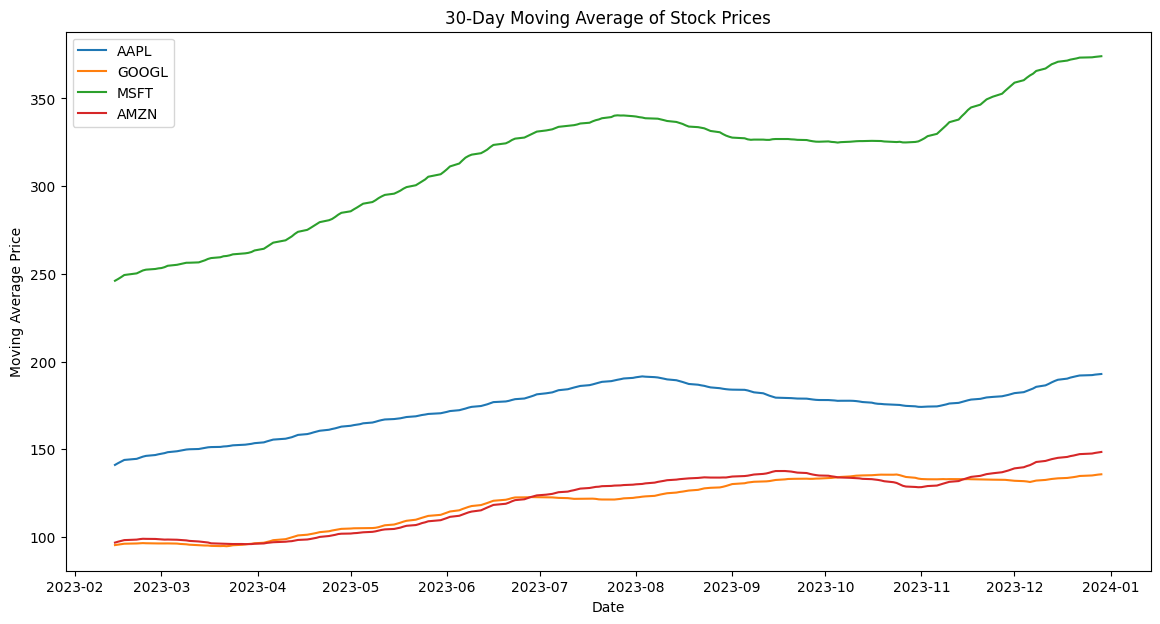

In [21]:
#moving average of various stocks
plt.figure(figsize=(14, 7))
movingAvg = stock_data['Close'].rolling(window=30).mean()
for stock in stocks:
    plt.plot(movingAvg[stock],label = stock)
plt.title('30-Day Moving Average of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Moving Average Price')
plt.legend()
plt.show()

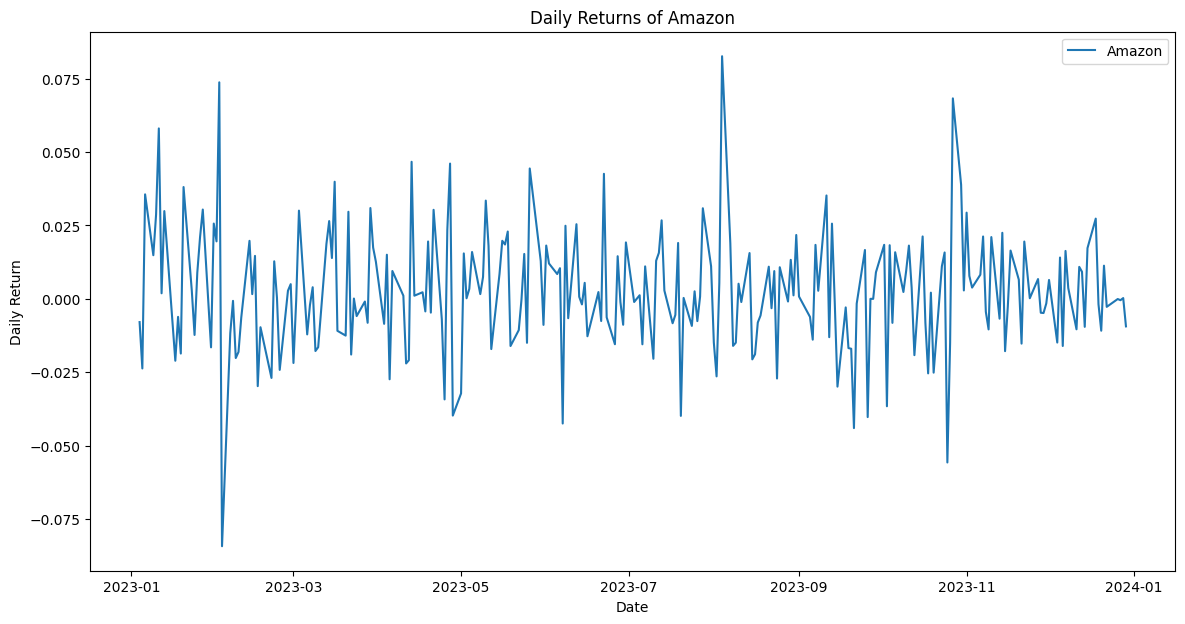

In [32]:
#daily return average of a stock
# Calculate daily returns
daily_returns = stock_data['Close'].pct_change()

# Plot daily returns for Amazon
plt.figure(figsize=(14, 7))
plt.plot(daily_returns['AMZN'], label='Amazon')
plt.title('Daily Returns of Amazon')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

In [37]:
# Add 'Trend' column to daily returns
daily_returns['Trend Apple'] = daily_returns['AAPL'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
daily_returns['Trend Amazon'] = daily_returns['AMZN'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
daily_returns['Trend Google'] = daily_returns['GOOGL'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
daily_returns['Trend Microsoft'] = daily_returns['MSFT'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
# Display the first few rows
print(daily_returns.head())

Ticker          AAPL      AMZN     GOOGL      MSFT     Trend Trend Apple  \
Date                                                                       
2023-01-03       NaN       NaN       NaN       NaN  Negative    Negative   
2023-01-04  0.010314 -0.007924 -0.011670 -0.043743  Negative    Positive   
2023-01-05 -0.010605 -0.023726 -0.021344 -0.029638  Negative    Negative   
2023-01-06  0.036794  0.035611  0.013225  0.011785  Positive    Positive   
2023-01-09  0.004089  0.014870  0.007786  0.009736  Positive    Positive   

Ticker     Trend Amazon Trend Google Trend Microsoft  
Date                                                  
2023-01-03     Negative     Negative        Negative  
2023-01-04     Negative     Negative        Negative  
2023-01-05     Negative     Negative        Negative  
2023-01-06     Positive     Positive        Positive  
2023-01-09     Positive     Positive        Positive  


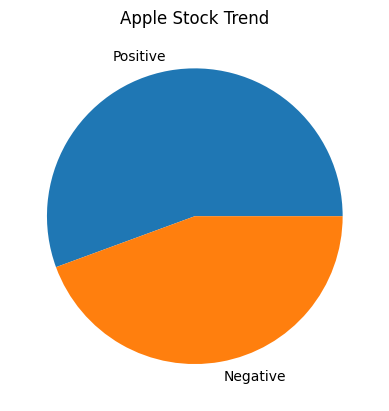

In [43]:
#Visualize Trend Frequency Through a Pie Chart
applTrend = daily_returns['Trend Apple'].value_counts()
amznTrend = daily_returns['Trend Amazon'].value_counts()
googlTrend = daily_returns['Trend Google'].value_counts()
msftTrend = daily_returns['Trend Microsoft'].value_counts()
plt.title('Apple Stock Trend')
plt.pie(applTrend.values,labels=applTrend.index)
plt.show()

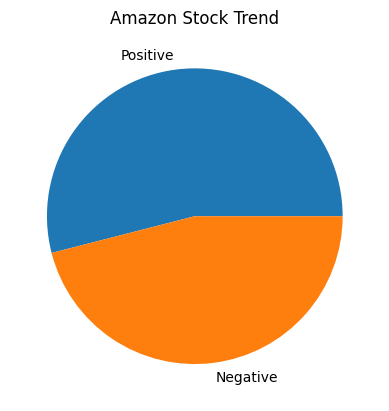

In [45]:
plt.title('Amazon Stock Trend')
plt.pie(amznTrend.values,labels=amznTrend.index)
plt.show()

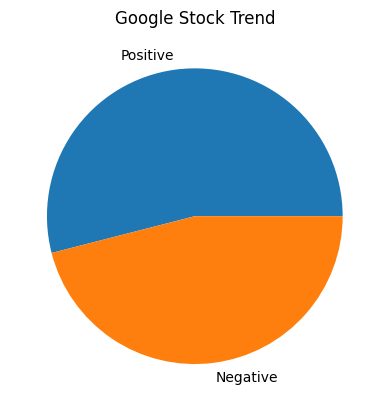

In [46]:
#Google Stock Trend
plt.title('Google Stock Trend')
plt.pie(googlTrend.values,labels=googlTrend.index)
plt.show()

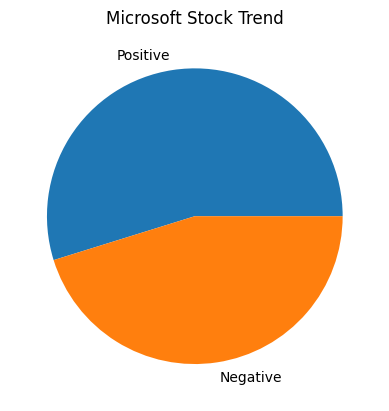

In [47]:
plt.title('Microsoft Stock Trend')
plt.pie(msftTrend.values,labels=msftTrend.index)
plt.show()

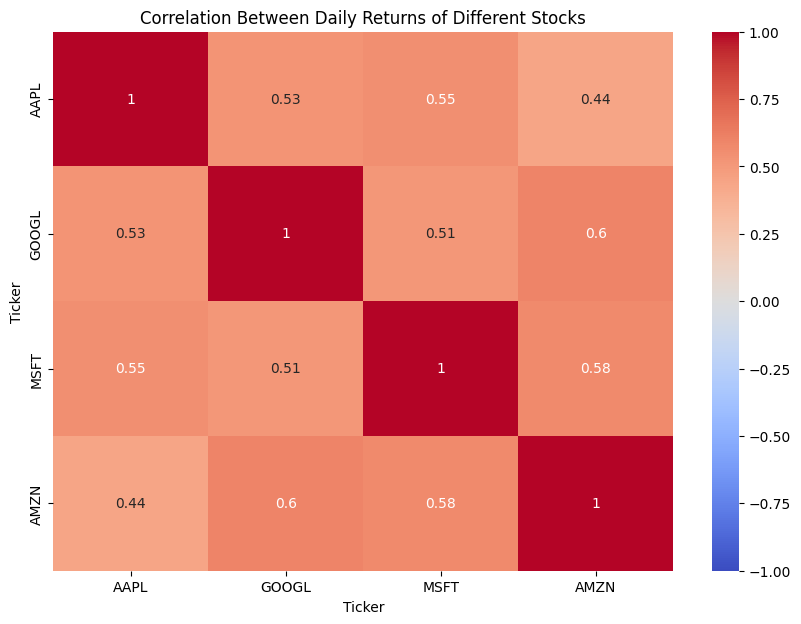

In [49]:
#Correlation Between Daily Returns of Different Stocks
correlation_matrix = daily_returns[stocks].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Daily Returns of Different Stocks')
plt.show()